In [314]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


%matplotlib inline

In [315]:
pwd

'/Users/simer'

In [316]:
life_df = pd.read_csv('/Users/simer/downloads/lifeexp.csv')

In [317]:
life_df = life_df.set_index('Country')
life_df = life_df.drop("Status", axis = 1)
#LE_name = {'Life expectancy ': "LE"}
#life_df = life_df.rename(columns = year_name)

life_df.rename(columns = {'Life expectancy ':'LE', 'Hepatitis B': 'Hepb', 'Total expenditure': 'Totalexp'}, inplace = True) 
life_df.head(99)


,Year,LE,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepb,Measles,BMI,under-five deaths,Polio,Totalexp,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,
Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
Afghanistan,2010,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
Afghanistan,2009,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,106,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
Afghanistan,2008,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,110,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
Afghanistan,2007,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,113,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4


In [291]:
life_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

life_df.replace('', np.nan, inplace=True)
life_df.dropna(inplace=True)

#['LE', 'Alcohol', 'Hepatitis B', ' BMI', 'Polio', 'Total expenditure', 'Diphtheria', 'GDP', 'Income composition of resources', 'Schooling']

#life_df = life_df.apply(lambda x:x.fillna(x.value_counts().index[0]))
life_df.isnull().sum()

Year                               0
LE                                 0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepb                               0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Totalexp                           0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

,Year,LE,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepb,Measles,BMI,under-five deaths,Polio,Totalexp,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.050771,-0.037092,0.008029,-0.113365,0.069553,0.114897,-0.053822,0.005739,0.010479,-0.016699,0.059493,0.029641,-0.123405,0.096421,0.012567,0.019757,0.014122,0.122892,0.088732
LE,0.050771,1.000000,-0.702523,-0.169074,0.402718,0.409631,0.199935,-0.068881,0.542042,-0.192265,0.327294,0.174718,0.341331,-0.592236,0.441322,-0.022305,-0.457838,-0.457508,0.721083,0.727630
Adult Mortality,-0.037092,-0.702523,1.000000,0.042450,-0.175535,-0.237610,-0.105225,-0.003967,-0.351542,0.060365,-0.199853,-0.085227,-0.191429,0.550691,-0.255035,-0.015012,0.272230,0.286723,-0.442203,-0.421171
infant deaths,0.008029,-0.169074,0.042450,1.000000,-0.106217,-0.090765,-0.231769,0.532680,-0.234425,0.996906,-0.156929,-0.146951,-0.161871,0.007712,-0.098092,0.671758,0.463415,0.461908,-0.134754,-0.214372
Alcohol,-0.113365,0.402718,-0.175535,-0.106217,1.000000,0.417047,0.109889,-0.050110,0.353396,-0.101082,0.240315,0.214885,0.242951,-0.027113,0.443433,-0.028880,-0.403755,-0.386208,0.561074,0.616975
percentage expenditure,0.069553,0.409631,-0.237610,-0.090765,0.417047,1.000000,0.016760,-0.063071,0.242738,-0.092158,0.128626,0.183872,0.134813,-0.095085,0.959299,-0.016792,-0.255035,-0.255635,0.402170,0.422088
Hepb,0.114897,0.199935,-0.105225,-0.231769,0.109889,0.016760,1.000000,-0.124800,0.143302,-0.240766,0.463331,0.113327,0.588990,-0.094802,0.041850,-0.129723,-0.129406,-0.133251,0.184921,0.215182
Measles,-0.053822,-0.068881,-0.003967,0.532680,-0.050110,-0.063071,-0.124800,1.000000,-0.153245,0.517506,-0.057850,-0.113583,-0.058606,-0.003522,-0.064768,0.321946,0.180642,0.174946,-0.058277,-0.115660
BMI,0.005739,0.542042,-0.351542,-0.234425,0.353396,0.242738,0.143302,-0.153245,1.000000,-0.242137,0.186268,0.189469,0.176295,-0.210897,0.266114,-0.081416,-0.547018,-0.554094,0.510505,0.554844
under-five deaths,0.010479,-0.192265,0.060365,0.996906,-0.101082,-0.092158,-0.240766,0.517506,-0.242137,1.000000,-0.171164,-0.145803,-0.178448,0.019476,-0.100331,0.658680,0.464785,0.462289,-0.148097,-0.226013


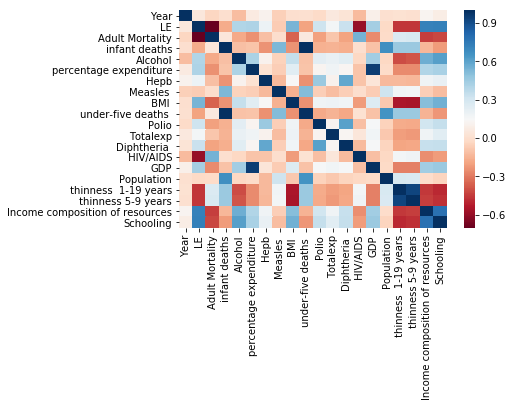

In [292]:
corr = life_df.corr()
display(corr)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

In [293]:
life_df_after = life_df
life_df_after = life_df.drop(["percentage expenditure","under-five deaths ", " thinness 5-9 years", 'Year', 'infant deaths', 'Population', 'Measles ', 'Hepb', 'Totalexp', 'Polio'], axis = 1)
X1 = sm.tools.add_constant(life_df_before)
X2 = sm.tools.add_constant(life_df_after)

#X = pd.get_dummies(data=X, drop_first=True)

series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

print('DATA BEFORE')
print('-'*100)
display(series_before)

print('DATA AFTER')
print('-'*100)
display(series_after)

DATA BEFORE
----------------------------------------------------------------------------------------------------


const                              285946.750392
Year                                    1.180387
LE                                      6.168389
Adult Mortality                         2.147319
infant deaths                         222.790826
Alcohol                                 2.079818
percentage expenditure                 12.928233
Hepb                                    1.680689
Measles                                 1.517624
 BMI                                    1.833955
under-five deaths                     212.986958
Polio                                   1.723701
Totalexp                                1.128263
Diphtheria                              2.101114
 HIV/AIDS                               2.086970
GDP                                    13.658846
Population                              1.943590
 thinness  1-19 years                   7.606118
 thinness 5-9 years                     7.589700
Income composition of resources         3.321859
Schooling           

DATA AFTER
----------------------------------------------------------------------------------------------------


const                              262.908932
LE                                   5.691803
Adult Mortality                      2.124640
Alcohol                              1.844241
 BMI                                 1.776366
Diphtheria                           1.181032
 HIV/AIDS                            1.959775
GDP                                  1.425293
 thinness  1-19 years                1.592904
Income composition of resources      3.170940
Schooling                            3.880785
dtype: float64

In [294]:
desc_df = life_df.describe()


desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)


desc_df

,Year,LE,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepb,Measles,BMI,under-five deaths,Polio,Totalexp,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000
+3_std,2020.103641,95.692807,544.146533,395.094634,16.620763,5976.661567,156.031699,32481.900295,97.391372,532.914129,150.916257,12.854081,148.892824,20.080948,39993.732239,2.260348e+08,18.648322,18.869033,1.180817,20.506053
-3_std,1995.577378,42.911802,-207.715969,-329.988509,-7.554371,-4578.714451,2.403716,-28032.911817,-21.134125,-444.473862,16.212912,-0.942231,19.417667,-16.113210,-28861.668465,-1.967276e+08,-8.947048,-9.053508,0.082285,3.733728


In [295]:
life_remove_df = life_df[(np.abs(stats.zscore(life_df)) < 3).all(axis=1)]
life_df.index.difference(life_remove_df.index)

Index(['Equatorial Guinea', 'India', 'Netherlands', 'Nigeria'], dtype='object', name='Country')

In [296]:
X = life_df_after.drop('LE', axis = 1)
Y = life_df_after[['LE']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

regression_model = LinearRegression()

regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [297]:
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is 52.54
----------------------------------------------------------------------------------------------------
The Coefficient for Adult Mortality is -0.018
The Coefficient for Alcohol is -0.11
The Coefficient for  BMI  is 0.034
The Coefficient for Diphtheria  is 0.021
The Coefficient for  HIV/AIDS is -0.43
The Coefficient for GDP is 6.9e-05
The Coefficient for  thinness  1-19 years is -0.074
The Coefficient for Income composition of resources is 1.1e+01
The Coefficient for Schooling is 0.92


In [298]:
y_predict = regression_model.predict(X_test)
y_predict[:5]

array([[82.97240309],
       [68.7298345 ],
       [70.67585526],
       [72.33569038],
       [71.16193565]])

In [299]:
X2 = sm.add_constant(X)
model = sm.OLS(Y, X2)
est = model.fit()



In [300]:
import statsmodels.stats.diagnostic as sm_diagnostic
from statsmodels.stats import diagnostic as diag

'''_, pval, __, f_pval = diag.het_white(est.resid, est.model.exog, retres=False)
print(pval, f_pval)
print('-'*100)

if pval > 0.05:
    print("For the White's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so there is no heterosecdasticity. \n")
    
else:
    print("For the White's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypthoesis, so there is heterosecdasticity. \n")

'''

    
_, pval, __, f_pval = sm_diagnostic.het_breuschpagan(est.resid, est.model.exog)
print(pval, f_pval)
print('-'*100)


if pval > 0.05:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so there is no heterosecdasticity.")
    
else:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypthoesis, so there is heterosecdasticity.")

6.355091084588661e-38 1.7667660488078173e-40
----------------------------------------------------------------------------------------------------
For the Breusch-Pagan's Test
The p-value was 6.355e-38
We reject the null hypthoesis, so there is heterosecdasticity.


The number of lags will be 10
----------------------------------------------------------------------------------------------------
The lowest p-value found was 0.0
We reject the null hypthoesis, so there is autocorrelation.
----------------------------------------------------------------------------------------------------


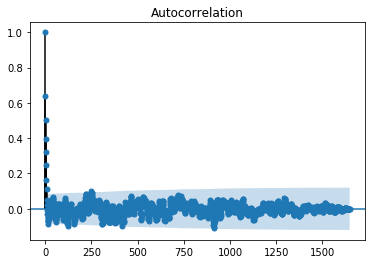

In [301]:
from statsmodels.stats.stattools import durbin_watson

lag = min(10, (len(X)//5))
print('The number of lags will be {}'.format(lag))
print('-'*100)

test_results = diag.acorr_ljungbox(est.resid, lags = lag)

ibvalue, p_val = test_results

if min(p_val) > 0.05:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We fail to reject the null hypthoesis, so there is no autocorrelation.")
    print('-'*100)
else:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We reject the null hypthoesis, so there is autocorrelation.")
    print('-'*100)

sm.graphics.tsa.plot_acf(est.resid)
plt.show()

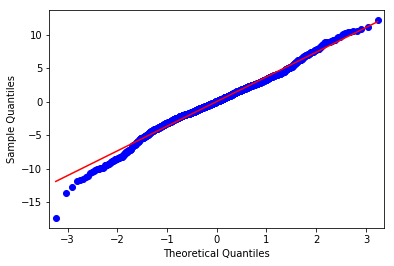

The mean of the residuals is 1.273e-12


In [302]:
import pylab

sm.qqplot(est.resid, line='s')
pylab.show()


mean_residuals = sum(est.resid)/ len(est.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

In [303]:
import math

model_mse = mean_squared_error(y_test, y_predict)

model_mae = mean_absolute_error(y_test, y_predict)

model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 12.6
MAE 2.65
RMSE 3.55


In [304]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

R2: 0.84


In [305]:
est.conf_int()

,0,1
const,51.213349,53.965347
Adult Mortality,-0.019951,-0.016181
Alcohol,-0.166337,-0.046358
BMI,0.024039,0.047891
Diphtheria,0.014579,0.032428
HIV/AIDS,-0.468908,-0.397402
GDP,0.000053,0.000089
thinness 1-19 years,-0.115345,-0.017513
Income composition of resources,8.449811,11.783584
Schooling,0.813404,1.048475


In [306]:
est.pvalues

const                               0.000000e+00
Adult Mortality                     1.433972e-71
Alcohol                             5.200417e-04
 BMI                                4.034256e-09
Diphtheria                          2.688022e-07
 HIV/AIDS                          1.686640e-107
GDP                                 4.729708e-14
 thinness  1-19 years               7.806238e-03
Income composition of resources     2.124846e-31
Schooling                           7.046123e-51
dtype: float64

In [307]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                     LE   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     854.4
Date:                Tue, 28 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:48:52   Log-Likelihood:                -4491.1
No. Observations:                1649   AIC:                             9002.
Df Residuals:                    1639   BIC:                             9056.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [308]:
import pickle

with open('my_mulitlinear_regression.sav','wb') as f:
     pickle.dump(regression_model, f)

with open('my_mulitlinear_regression.sav', 'rb') as pickle_file:
     regression_model_2 = pickle.load(pickle_file)

#regression_model_2.predict([X_test.loc['Zimbabwe']])

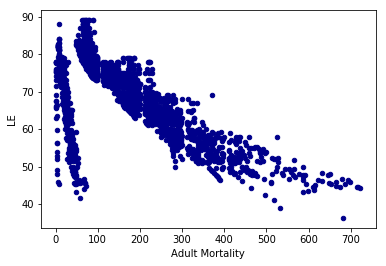

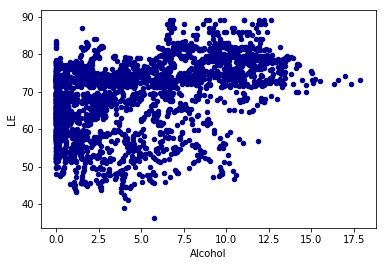

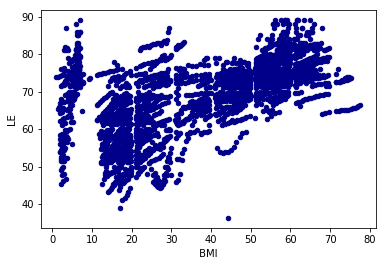

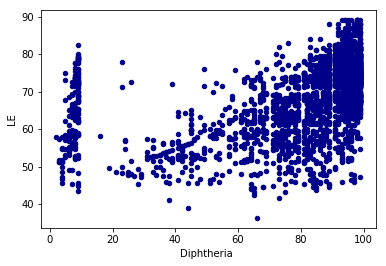

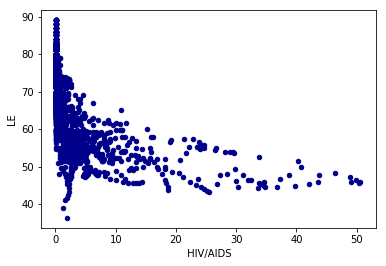

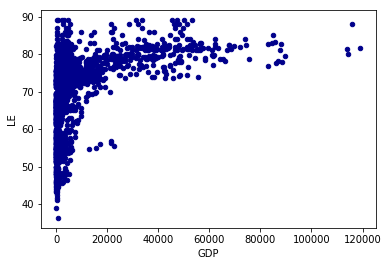

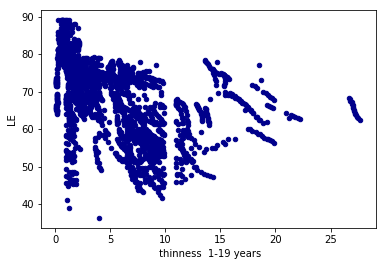

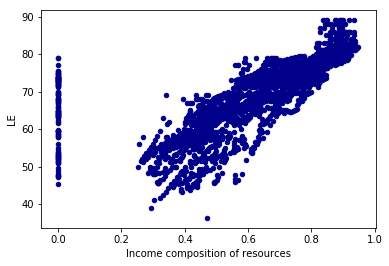

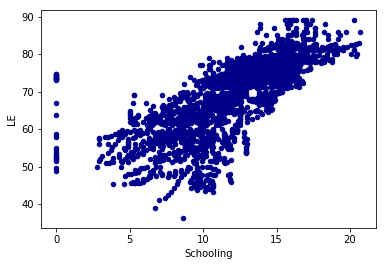

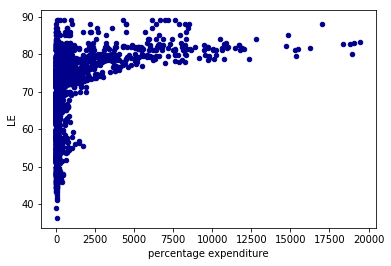

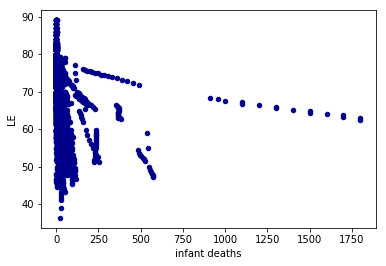

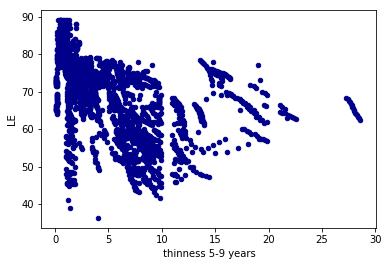

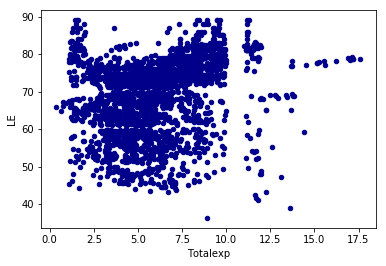

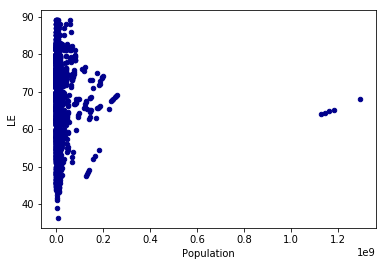

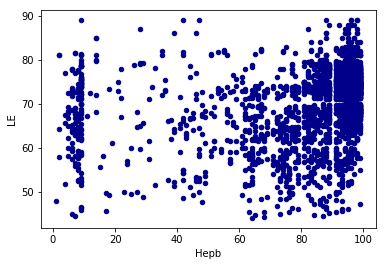

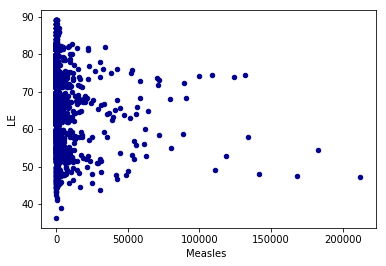

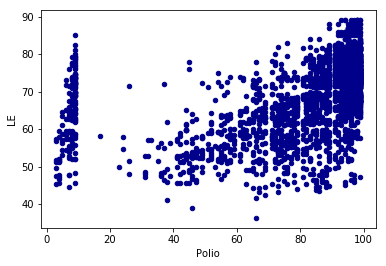

In [324]:
ax1 = life_df.plot.scatter(x = 'Adult Mortality', y = 'LE', c = 'DarkBlue')
ax2 = life_df.plot.scatter(x = 'Alcohol', y = 'LE', c = 'DarkBlue')
ax3 = life_df.plot.scatter(x = ' BMI ', y = 'LE', c = 'DarkBlue')
ax4 = life_df.plot.scatter(x = 'Diphtheria ', y = 'LE', c = 'DarkBlue')
ax5 = life_df.plot.scatter(x = ' HIV/AIDS', y = 'LE', c = 'DarkBlue')
ax6 = life_df.plot.scatter(x = 'GDP', y = 'LE', c = 'DarkBlue')
ax7 = life_df.plot.scatter(x = ' thinness  1-19 years', y = 'LE', c = 'DarkBlue')
ax8 = life_df.plot.scatter(x = 'Income composition of resources', y = 'LE', c = 'DarkBlue')
ax9 = life_df.plot.scatter(x = 'Schooling', y = 'LE', c = 'DarkBlue')
ax10 = life_df.plot.scatter(x = 'percentage expenditure', y = 'LE', c = 'DarkBlue')
ax11 = life_df.plot.scatter(x = 'infant deaths', y = 'LE', c = 'DarkBlue')
ax12 = life_df.plot.scatter(x = ' thinness 5-9 years', y = 'LE', c = 'DarkBlue')
ax13 = life_df.plot.scatter(x = 'Totalexp', y = 'LE', c = 'DarkBlue')
ax14 = life_df.plot.scatter(x = 'Population', y = 'LE', c = 'DarkBlue')
ax15 = life_df.plot.scatter(x = 'Hepb', y = 'LE', c = 'DarkBlue')
ax16 = life_df.plot.scatter(x = 'Measles ', y = 'LE', c = 'DarkBlue')
ax17 = life_df.plot.scatter(x = 'Polio', y = 'LE', c = 'DarkBlue')

[-4.972403087756646, 4.270165503455701, -0.9758552574583774, 1.564309616602344, 3.8380643518626414, -1.7645516566616095, -1.744059900316003, -1.0060956986833816, 2.07684167365683, 3.08767974582112, 1.6011837558109363, 2.8504940270330934, -3.0553099898927556, 3.5052788630894014, -0.9132798180548463, -2.5856325174160446, 0.912332510384438, 0.9213069909944522, -0.8540118825987406, -5.234282149149507, 2.1476553266371354, 2.419900031319301, -0.4236341160207644, 1.4425449343299874, -1.8490937844827329, -8.387200840699137, -4.536392224039304, 2.4235139519218336, 0.2650924531335974, -1.8753066777436658, -11.317073091022309, -0.7010922060271128, 7.275910672849108, 2.5531268815657597, -0.7440403553045201, -4.2748874349211405, -0.9696964896154867, 2.382350001965591, 6.734992444166593, 4.105151781174257, -1.8941344747567541, 2.804958362933945, 1.8918125769393868, -2.1217279682758914, 0.14905345518145907, 1.4174015734974716, -0.6336140890605151, -0.9870770203020385, 2.4685765126545363, -0.216321977

Text(0, 0.5, 'Residuals')

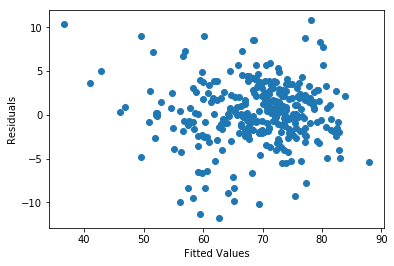

In [310]:
y_pred = []


for i in range(len(y_predict)):
    for j in range(len(y_predict[i])):
        y_pred.append(y_predict[i][j])

residuals = []
for i in range (len(y_test['LE'])):
    residuals.append(y_test['LE'][i]-y_predict[i])

r = []
    
for i in range (len(residuals)):
    for j in range (len(residuals[i])):
        r.append(residuals[i][j])
print(r)

#plt.hist(r)
plt.scatter(y_pred,r)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

In [311]:
desc_df1 = life_df_after.describe()


desc_df1.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df1.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)


desc_df1

,LE,Adult Mortality,Alcohol,BMI,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000
mean,69.302304,168.215282,4.533196,38.128623,84.155246,1.983869,5566.031887,4.850637,0.631551,12.119891
std,8.796834,125.310417,4.029189,19.754249,21.579193,6.032360,11475.900117,4.599228,0.183089,2.795388
min,44.000000,1.000000,0.010000,2.000000,2.000000,0.100000,1.681350,0.100000,0.000000,4.200000
25%,64.400000,77.000000,0.810000,19.500000,82.000000,0.100000,462.149650,1.600000,0.509000,10.300000
50%,71.700000,148.000000,3.790000,43.700000,92.000000,0.100000,1592.572182,3.000000,0.673000,12.300000
75%,75.000000,227.000000,7.340000,55.800000,97.000000,0.700000,4718.512910,7.100000,0.751000,14.000000
max,89.000000,723.000000,17.870000,77.100000,99.000000,50.600000,119172.741800,27.200000,0.936000,20.700000
+3_std,95.692807,544.146533,16.620763,97.391372,148.892824,20.080948,39993.732239,18.648322,1.180817,20.506053
-3_std,42.911802,-207.715969,-7.554371,-21.134125,19.417667,-16.113210,-28861.668465,-8.947048,0.082285,3.733728


In [312]:
corr2 = life_df_after.corr()
display(corr2)

,LE,Adult Mortality,Alcohol,BMI,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,Income composition of resources,Schooling
LE,1.000000,-0.702523,0.402718,0.542042,0.341331,-0.592236,0.441322,-0.457838,0.721083,0.727630
Adult Mortality,-0.702523,1.000000,-0.175535,-0.351542,-0.191429,0.550691,-0.255035,0.272230,-0.442203,-0.421171
Alcohol,0.402718,-0.175535,1.000000,0.353396,0.242951,-0.027113,0.443433,-0.403755,0.561074,0.616975
BMI,0.542042,-0.351542,0.353396,1.000000,0.176295,-0.210897,0.266114,-0.547018,0.510505,0.554844
Diphtheria,0.341331,-0.191429,0.242951,0.176295,1.000000,-0.117601,0.158438,-0.187242,0.343262,0.350398
HIV/AIDS,-0.592236,0.550691,-0.027113,-0.210897,-0.117601,1.000000,-0.108081,0.172592,-0.248590,-0.211840
GDP,0.441322,-0.255035,0.443433,0.266114,0.158438,-0.108081,1.000000,-0.277498,0.446856,0.467947
thinness 1-19 years,-0.457838,0.272230,-0.403755,-0.547018,-0.187242,0.172592,-0.277498,1.000000,-0.453679,-0.491199
Income composition of resources,0.721083,-0.442203,0.561074,0.510505,0.343262,-0.248590,0.446856,-0.453679,1.000000,0.784741
Schooling,0.727630,-0.421171,0.616975,0.554844,0.350398,-0.211840,0.467947,-0.491199,0.784741,1.000000
